# Anomaly detection

**Using univariate or multivariate Gaussian**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from anomaly_detector import AnomalyDetector

### Dataset

In [4]:
size = 200

x = np.random.normal(0,3,(size))
y = np.random.normal(0,20,(size))+x*5
X = np.hstack((x,y)).reshape(2,size).T

# add some outliers
X[12] = 10,52
X[182] = 5,-50

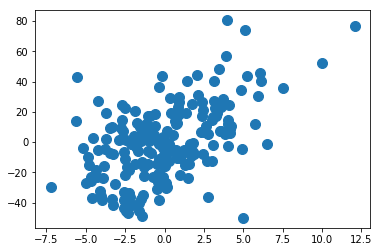

In [5]:
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

### Detector

In [6]:
detector = AnomalyDetector()

In [7]:
detector.fit(X)

In [8]:
uni = detector.detect_anomalous(X,0.0001,'uni')

In [9]:
multi = detector.detect_anomalous(X,0.000001,'multi')

### Visualize

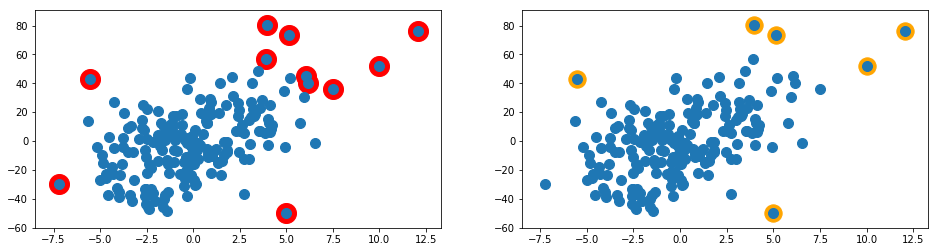

In [10]:
fig, axes = plt.subplots(ncols=2,figsize=(16,4))
axes[0].scatter(X[uni,0],X[uni,1],c='r',s=400)
axes[0].scatter(X[:,0],X[:,1],s=100)

axes[1].scatter(X[multi,0],X[multi,1],c='orange',s=300)
axes[1].scatter(X[:,0],X[:,1],s=100)

plt.show()

### Options

Input type can be shorthanded or not

In [11]:
detector.detect_anomalous(X,0.0001,'univariate')
detector.detect_anomalous(X,0.0001,'uni')

(array([ 12,  31,  35,  78,  85, 106, 111, 124, 130, 155, 182]),)

**Not sure how to choose Epsilon? provide one known anomalous sample, and get a starting point**

In [12]:
detector.suggest_epsilon(X[182],'uni')

7.040180754055409e-05

In [13]:
detector.suggest_epsilon(X[182],'multi')

3.5846524214740306e-08

**Note: Epsilon should probably be slightly above this**

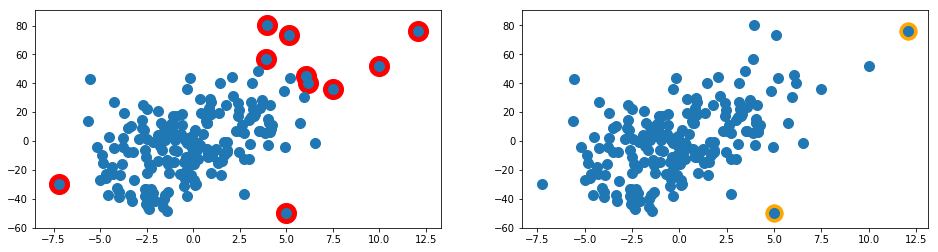

In [14]:
uni = detector.detect_anomalous(X,0.00008,'uni')
multi = detector.detect_anomalous(X,0.00000004,'multi')
fig, axes = plt.subplots(ncols=2,figsize=(16,4))
axes[0].scatter(X[uni,0],X[uni,1],c='r',s=400)
axes[0].scatter(X[:,0],X[:,1],s=100)

axes[1].scatter(X[multi,0],X[multi,1],c='orange',s=300)
axes[1].scatter(X[:,0],X[:,1],s=100)

plt.show()

In this case, because the point is 'off the diagonal' the univariate anomaly detection performs poorly
<br><br>

In [15]:
detector.suggest_epsilon(X[12],'uni')

9.532603369261636e-07

In [16]:
detector.suggest_epsilon(X[12],'multi')

1.5234215612497342e-07

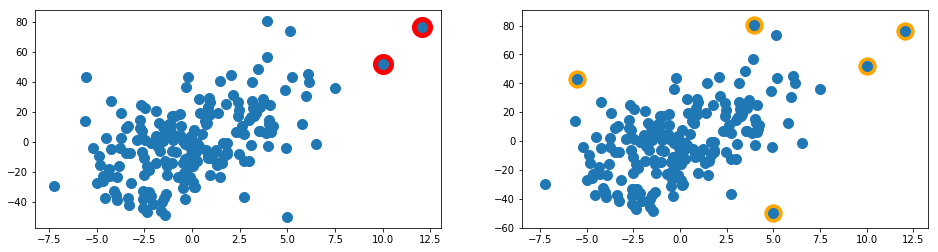

In [17]:
uni = detector.detect_anomalous(X,0.000001,'uni')
multi = detector.detect_anomalous(X,0.0000002,'multi')
fig, axes = plt.subplots(ncols=2,figsize=(16,4))
axes[0].scatter(X[uni,0],X[uni,1],c='r',s=400)
axes[0].scatter(X[:,0],X[:,1],s=100)

axes[1].scatter(X[multi,0],X[multi,1],c='orange',s=300)
axes[1].scatter(X[:,0],X[:,1],s=100)

plt.show()

In this case, the multivariate is possibly too sensitive

**Overall, user should choose depending on the case and required sensitivity**